# Sentinel-5P

* **Products used:** 
[s5p_tropomi_l2_aer_ai](https://explorer.digitalearth.africa/products/s5p_tropomi_l2_aer_ai)
[s5p_tropomi_l2_ch4](https://explorer.digitalearth.africa/products/s5p_tropomi_l2_ch4)
[s5p_tropomi_l2_cloud](https://explorer.digitalearth.africa/products/s5p_tropomi_l2_cloud)
[s5p_tropomi_l2_co](https://explorer.digitalearth.africa/products/s5p_tropomi_l2_co)
[s5p_tropomi_l2_hcho](https://explorer.digitalearth.africa/products/s5p_tropomi_l2_hcho)
[s5p_tropomi_l2_no2](https://explorer.digitalearth.africa/products/s5p_tropomi_l2_no2)
[s5p_tropomi_l2_o3](https://explorer.digitalearth.africa/products/s5p_tropomi_l2_o3)
[s5p_tropomi_l2_so2](https://explorer.digitalearth.africa/products/s5p_tropomi_l2_so2)

## Background

Sentinel-5P is an Earth observation satellite launched in 2017 and operated by the European Space Agency under the Copernicus Programme. It was developed as a precursor mission to the future Sentinel-5 mission to ensure continuity of atmospheric observations following earlier European missions.

The core objective of Sentinel-5P is to provide near-real-time, global measurements of atmospheric composition and air quality. Its data supports scientific research, environmental monitoring, and policy implementation related to air pollution, climate change, ozone layer depletion, and human health. The mission produces datasets that allow scientists to track pollutants and trace gases spatially and temporally across the globe.

Sentinel-5P carries a single instrument—the TROPOMI (Tropospheric Monitoring Instrument)—which measures solar radiation reflected from the Earth’s atmosphere and surface across ultraviolet, visible, near-infrared, and shortwave infrared spectral bands. From these measurements, concentration values for various trace gases and aerosol properties are retrieved. Compared to previous instruments, TROPOMI offers unprecedented spatial resolution, enabling detection of emission sources such as urban pollution, biomass burning, and industrial activities.

Level-2 products are geophysical datasets derived from measured radiances and converted into physically meaningful variables such as gas concentrations and aerosol properties. Each product addresses a specific atmospheric component relevant to air quality, weather, and climate processes.

### Sentinel-5P TROPOMI Level-2 Products and Their Functions

1. **UV Aerosol Index (UVAI)** detects the presence of light-absorbing aerosol particles such as smoke, dust, and volcanic ash in the atmosphere, helping to monitor air pollution and transboundary aerosol transport.

2. **Methane (CH₄) total column** measures the vertically integrated concentration of methane in the atmosphere and is used to identify major greenhouse gas emission sources and support climate change research.

3. **Cloud fraction** quantifies the proportion of each satellite pixel covered by clouds, which is essential for correcting trace-gas retrievals and analyzing cloud coverage patterns.

4. **Cloud albedo** represents how much sunlight is reflected by clouds and helps assess their cooling or warming effect on the Earth’s climate system.

5. **Cloud top pressure** indicates cloud height and is used to study atmospheric structure, weather systems, and radiative impacts of clouds.

6. **Carbon Monoxide (CO) total column** measures atmospheric CO concentration, serving as an indicator of combustion processes such as biomass burning, industrial activity, and traffic emissions.

7. **Formaldehyde (HCHO) total column** is used to detect emissions from vegetation and human activities and acts as a proxy for volatile organic compounds (VOCs) that contribute to ozone formation.

8. **Nitrogen Dioxide (NO₂) total column** measures total atmospheric NO₂ including both stratospheric and surface contributions and is used in pollution assessment and atmospheric chemistry studies.

9. **Tropospheric Nitrogen Dioxide (NO₂)** isolates surface-level NO₂ levels that directly reflect urban pollution from vehicles, power plants, and industries.

10. **Ozone (O₃) total column** measures the total ozone layer thickness and is essential for monitoring ultraviolet radiation exposure and atmospheric health.

11. **Sulfur Dioxide (SO₂) total column** detects trace amounts of SO₂ released from power plants and volcanoes and is used in air-quality regulation and disaster monitoring.

This notebook demonstrates how each Sentinel-5P TROPOMI product can be accessed and loaded through the Digital Earth Africa (DE Africa) platform.

***

## Description

This notebook will cover following topics:

1. Inspecting the products and measurements available in the datacube
2. Loading Sentinel-5P_*** Datasets.
3. Plotting the results

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

### Load packages
Import Python packages that are used for the analysis.

In [1]:
%matplotlib inline

import numpy as np
import xarray as xr
import pandas as pd
import datacube
import geopandas as gpd
from odc.geo.geom import Geometry

from deafrica_tools.plotting import display_map
from deafrica_tools.areaofinterest import define_area

### Connect to the datacube

Connect to the datacube so we can access DE Africa data.

In [2]:
dc = datacube.Datacube(app="Sentinel_5P")

### List products

We can use datacube's `list_products` functionality to inspect DE Africa's products that are available in the datacube. The table below shows the product names that we will use to load the data, a brief description of the data, and the satellite instrument that acquired the data.

In [3]:
dc.list_products().loc[dc.list_products()['description'].str.contains('Sentinel-5p')]

,name,description,license,default_crs,default_resolution
name,,,,,
s5p_tropomi_l2_aer_ai,s5p_tropomi_l2_aer_ai,Sentinel-5p TROPOMI Level 2 UV Aerosol Index.,CC-BY-4.0,EPSG:4326,"(-0.01, 0.01)"
s5p_tropomi_l2_ch4,s5p_tropomi_l2_ch4,Sentinel-5p TROPOMI Level 2 Methane (CH4) tota...,CC-BY-4.0,EPSG:4326,"(-0.01, 0.01)"
s5p_tropomi_l2_cloud,s5p_tropomi_l2_cloud,"Sentinel-5p TROPOMI Level 2 Cloud fraction, al...",CC-BY-4.0,EPSG:4326,"(-0.01, 0.01)"
s5p_tropomi_l2_co,s5p_tropomi_l2_co,Sentinel-5p TROPOMI Level 2 Carbon Monoxide (C...,CC-BY-4.0,EPSG:4326,"(-0.01, 0.01)"
s5p_tropomi_l2_hcho,s5p_tropomi_l2_hcho,Sentinel-5p TROPOMI Level 2 Formaldehyde (HCHO...,CC-BY-4.0,EPSG:4326,"(-0.01, 0.01)"
s5p_tropomi_l2_no2,s5p_tropomi_l2_no2,Sentinel-5p TROPOMI Level 2 Nitrogen Dioxide (...,CC-BY-4.0,EPSG:4326,"(-0.01, 0.01)"
s5p_tropomi_l2_o3,s5p_tropomi_l2_o3,Sentinel-5p TROPOMI Level 2 Ozone (O3) total c...,CC-BY-4.0,EPSG:4326,"(-0.01, 0.01)"
s5p_tropomi_l2_so2,s5p_tropomi_l2_so2,Sentinel-5p TROPOMI Level 2 Sulfur Dioxide (SO...,CC-BY-4.0,EPSG:4326,"(-0.01, 0.01)"


### List measurements

We can further inspect the data available for the Sentinel-5P Land product using datacube's `list_measurements` functionality.

To retrieve the measurement information for any product listed above, please select the product by specifying its name. For example, we will use `s5p_tropomi_l2_aer_ai`.

In [4]:
product = "s5p_tropomi_l2_so2"

The table below lists each of the measurements available in the data.

In [5]:
measurements = dc.list_measurements()
measurements.loc[product]

,name,dtype,units,nodata,aliases,flags_definition,add_offset,scale_factor
measurement,,,,,,,,
SO2,SO2,float32,DU,-9999,NaN,NaN,0.0,1.0
dataMask,dataMask,uint8,1,255,NaN,NaN,0.0,1.0


### Summary of the Measurements

Sentinel-5P TROPOMI Level-2 products are provided as fully geophysical variables, meaning the values are already delivered in standard scientific units such as mol/m², hPa, or unitless indices, with no additional scale factors or offsets required.Each product represents a different atmospheric property, so the expected numerical ranges vary according to the physical quantity being measured—for example, trace-gas total columns typically fall within small molar concentrations, while cloud variables are reported as dimensionless fractions between 0 and 1. Understanding these units and their typical value ranges is important for interpreting the magnitude and behavior of each atmospheric parameter, identifying abnormal events, and performing consistent regional or temporal comparisons. The table below summarises the units, typical data ranges, and scale/offset requirements for all Sentinel-5P Level-2 products used in this study.

| Product                                 | Units          | Typical Range    | Scale/Offset |
| --------------------------------------- | -------------- | ---------------- | -------------------- |
| **UV Aerosol Index (UVAI)**             | Unitless       | −2 to +10        | No                   |
| **Methane (CH₄) Total Column**          | mol/m²         | 1.7e−2 to 2.2e−2 | No                   |
| **Cloud Fraction**                      | Unitless (0–1) | 0–1              | No                   |
| **Cloud Albedo**                        | Unitless (0–1) | 0.05–0.8         | No                   |
| **Cloud Top Pressure**                  | hPa            | 100–1000         | No                   |
| **Carbon Monoxide (CO) Total Column**   | mol/m²         | 0.02–0.07        | No                   |
| **Formaldehyde (HCHO) Total Column**    | mol/m²         | 1e−5 to 8e−5     | No                   |
| **Nitrogen Dioxide (NO₂) Total Column** | mol/m²         | <5e−5 to 5e−4    | No                   |
| **Tropospheric NO₂ Column**             | mol/m²         | <1e−5 to 3e−4    | No                   |
| **Ozone (O₃) Total Column**             | mol/m²         | 0.08–0.12        | No                   |
| **Sulfur Dioxide (SO₂) Total Column**   | mol/m²         | 0 to >1e−4       | No                   |


### Analysis parameters

The following cell sets the parameters, which define the area of interest to conduct the analysis over.
#### Select location
To define the area of interest, there are two methods available:

1. By specifying the latitude, longitude, and buffer, or separate latitude and longitude buffers, this method allows you to define an area of interest around a central point. You can input the central latitude, central longitude, and a buffer value in degrees to create a square area around the center point. For example, `lat = 10.338`, `lon = -1.055`, and `buffer = 0.1` will select an area with a radius of 0.1 square degrees around the point with coordinates `(10.338, -1.055)`. 
    
    Alternatively, you can provide separate buffer values for latitude and longitude for a rectangular area. For example, `lat = 10.338`, `lon = -1.055`, and `lat_buffer = 0.1` and`lon_buffer = 0.08` will select a rectangular area extending 0.1 degrees north and south, and 0.08 degrees east and west from the point `(10.338, -1.055)`.

   For reasonable loading times, set the buffer as `0.1` or lower.

3. By uploading a polygon as a `GeoJSON or Esri Shapefile`. If you choose this option, you will need to upload the geojson or ESRI shapefile into the Sandbox using Upload Files button <img align="top" src="../Supplementary_data/upload_files_icon.png"> in the top left corner of the Jupyter Notebook interface. ESRI shapefiles must be uploaded with all the related files `(.cpg, .dbf, .shp, .shx)`. Once uploaded, you can use the shapefile or geojson to define the area of interest. Remember to update the code to call the file you have uploaded.

To use one of these methods, you can uncomment the relevant line of code and comment out the other one. To comment out a line, add the `"#"` symbol before the code you want to comment out. By default, the first option which defines the location using latitude, longitude, and buffer is being used.

**If running the notebook for the first time**, keep the default settings below.
This will demonstrate how the analysis works and provide meaningful results.

The example focuses on the Mpumalanga Highveld in South Africa. It combines massive industrial emissions, intense power generation, methane-rich mining zones, biomass burning, dust, and photochemical ozone production—meaning every atmospheric gas S5P measures appears with strong, clear signals. The region remains observable through most of the year, with August–October providing the richest multi-gas scenario. The Mpumalanga Highveld therefore serves as an ideal demonstration site for the strengths of Sentinel-5P Level-2 products in complex and dynamic environmental conditions.

**To run the notebook for a different area**, make sure Sentinel-5 Precursor’s TROPOMI data is available for the chosen area using the [DEAfrica Explorer](https://explorer.digitalearth.africa).

In [6]:
# Method 1: Specify the latitude, longitude, and buffer)
aoi = define_area(lat=-25.6, lon=29.3, buffer=1)
# Method 2: Use a polygon as a GeoJSON or Esri Shapefile. 
# aoi = define_area(vector_path='aoi.shp')

#Create a geopolygon and geodataframe of the area of interest
geopolygon = Geometry(aoi["features"][0]["geometry"], crs="epsg:4326")
geopolygon_gdf = gpd.GeoDataFrame(geometry=[geopolygon], crs=geopolygon.crs)

# Get the latitude and longitude range of the geopolygon
lat_range = (geopolygon_gdf.total_bounds[1], geopolygon_gdf.total_bounds[3])
lon_range = (geopolygon_gdf.total_bounds[0], geopolygon_gdf.total_bounds[2])

In [7]:
display_map(x=lon_range, y=lat_range)

### Accessing Sentinel 5P data through DE Africa

Now that we know what products and measurements are available for the product, we can load data from the datacube using `dc.load`. We will load data from spectral satellite bands. By specifying `output_crs='EPSG:4326'` and `resolution=(-0.01, 0.01`), we are loading data in its native projection and resolution. Finally, `group_by='solar_day'` ensures that overlapping images taken within seconds of each other as the satellite passes over are combined into a single time step in the data. The query defined below will be used for all the other products.

In [8]:
query = {
    'x': (lon_range),
    'y': (lat_range),
    'time':('2023-07-18', '2023-07-19'),
    'output_crs': 'EPSG:4326',
    'resolution': (-0.01, 0.01)}

#### 1. Sentinel-5P TROPOMI Level 2 UV Aerosol Index

Sentinel-5P TROPOMI Level-2 UV Aerosol Index (UVAI) is a satellite-derived indicator from Sentinel-5 Precursor’s TROPOMI that highlights the presence of light-absorbing aerosols (such as desert dust, wildfire smoke, and volcanic ash) in the atmosphere by comparing measured ultraviolet radiation with what would be expected from a clear molecular atmosphere. UVAI is used to rapidly detect and track aerosol plumes, support air-quality monitoring and hazard response (e.g., dust storms and eruptions), assess transboundary pollution transport, and study how aerosols influence Earth’s radiation balance and climate.

In [9]:
ds_aer_ai = dc.load(product='s5p_tropomi_l2_aer_ai',
                group_by="solar_day",
                **query)

ds_aer_ai

<xarray.Dataset> Size: 723kB
Dimensions:         (time: 2, latitude: 200, longitude: 200)
Coordinates:
  * time            (time) datetime64[ns] 16B 2023-07-18T05:57:16.500000 2023...
  * latitude        (latitude) float64 2kB -24.61 -24.62 ... -26.59 -26.59
  * longitude       (longitude) float64 2kB 28.3 28.32 28.32 ... 30.29 30.29
    spatial_ref     int32 4B 4326
Data variables:
    AER_AI_340_380  (time, latitude, longitude) float32 320kB -0.1253 ... -0....
    AER_AI_354_388  (time, latitude, longitude) float32 320kB -0.1178 ... 0.0...
    dataMask        (time, latitude, longitude) uint8 80kB 1 1 1 1 1 ... 1 1 1 1
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

#### Masking

Before visualisation, we use the `dataMask` band to mask values affected by cloud or other issues. The code below keeps data for pixels where the data mask value is 1.

In [10]:
ds_aer_ai = ds_aer_ai.where(ds_aer_ai.dataMask == 1)

#### Visualising the band

The wavelength pairs `340–380 nm (AER_AI_340_380)` and `354–388 nm (AER_AI_354_388)` are the two spectral combinations used by Sentinel-5P/TROPOMI to compute the UV Aerosol Index. The `340–380 nm` pair is a legacy configuration aligned with earlier instruments such as OMI, making it useful for historical continuity and long-term aerosol trend analysis. In contrast, the `354–388 nm`  pair is optimized for TROPOMI’s radiometric characteristics and produces more stable, lower-noise UVAI retrievals, especially over bright surfaces like deserts, making it the recommended operational product for most applications. In essence, both wavelength pairs detect absorbing aerosols, but `354–388 nm` is better matched to TROPOMI’s calibration and offers improved performance for scientific and monitoring use.. The cell below visualizes one of the available bands; the `AER_AI_354_388` band will be used. This is the recommended UV Aerosol Index product for Sentinel-5P TROPOMI because it is optimized for the instrument’s spectral bands and provides more stable, operationally supported aerosol monitoring. The `AER_AI_340_380` band is mainly retained for historical comparison with older satellite missions.

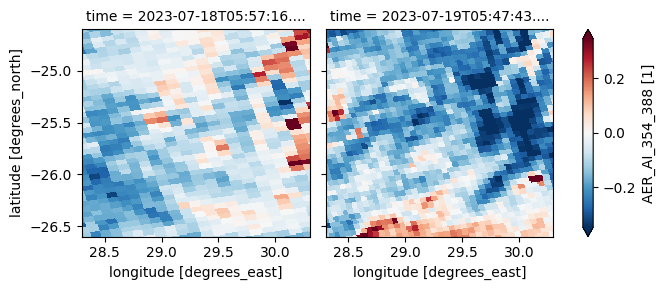

In [11]:
ds_aer_ai['AER_AI_354_388'].plot(robust=True, col="time")

#### 2. Sentinel-5P TROPOMI Level-2 Methane (CH₄) Total Column

Sentinel-5P TROPOMI Level-2 Methane (CH₄) Total Column is a satellite product from Sentinel-5 Precursor’s TROPOMI that measures the vertically integrated amount of methane in the atmosphere by analyzing reflected shortwave-infrared sunlight. It is used to detect and map methane emission hotspots, quantify regional sources from oil and gas operations, agriculture and wetlands, monitor trends in a major greenhouse gas, and support climate policy and mitigation efforts.

In [12]:
ds_l2_ch4 = dc.load(product='s5p_tropomi_l2_ch4',
                    group_by="solar_day", 
                    **query)

ds_l2_ch4

<xarray.Dataset> Size: 403kB
Dimensions:      (time: 2, latitude: 200, longitude: 200)
Coordinates:
  * time         (time) datetime64[ns] 16B 2023-07-18T05:57:16.500000 2023-07...
  * latitude     (latitude) float64 2kB -24.61 -24.62 -24.62 ... -26.59 -26.59
  * longitude    (longitude) float64 2kB 28.3 28.32 28.32 ... 30.27 30.29 30.29
    spatial_ref  int32 4B 4326
Data variables:
    CH4          (time, latitude, longitude) float32 320kB 1.871e+03 ... nan
    dataMask     (time, latitude, longitude) uint8 80kB 1 1 1 1 1 ... 0 0 0 0 0
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

#### Masking

Before visualisation, we use the `dataMask` band to mask values affected by cloud or other issues. The code below keeps data for pixels where the data mask value is 1.

In [13]:
ds_l2_ch4 = ds_l2_ch4.where(ds_l2_ch4.dataMask == 1)

#### Visualising the band

Methane (CH₄) is a potent greenhouse gas emitted by wetlands, livestock, oil and gas production, landfills, and rice fields. Sentinel-5P measures CH₄ in mol/m², with typical total-column values around 1.7×10⁻² to 2.2×10⁻² mol/m², often converted to parts per billion (ppb) for climate analysis.

A powerful greenhouse gas emitted by wetlands, agriculture (especially livestock), oil and gas production, landfills, and fires. It plays a major role in climate warming and atmospheric chemical reactions.

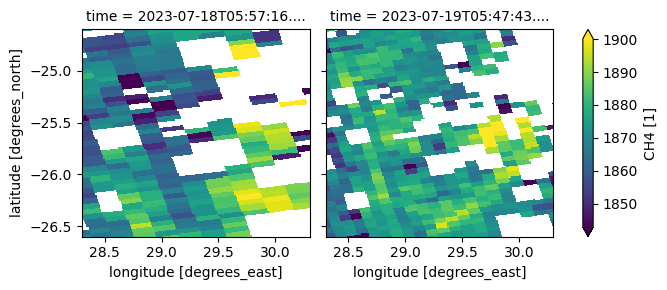

In [14]:
ds_l2_ch4['CH4'].plot(robust=True, col="time")

#### 3. Sentinel-5p TROPOMI Level 2 Cloud fraction, albedo, top pressure

Sentinel-5P TROPOMI Level-2 Cloud Fraction, Cloud Albedo, and Cloud Top Pressure are atmospheric products from Sentinel-5 Precursor’s TROPOMI that describe cloud coverage, brightness, and height for each satellite pixel, derived from reflected solar radiation measurements. These cloud parameters are used to improve the accuracy of trace-gas retrievals (by correcting for cloud contamination), to study cloud distribution and radiative effects, and to support weather and climate analysis by quantifying how clouds influence Earth’s energy balance and atmospheric structure

In [15]:
ds_l2_cloud = dc.load(product='s5p_tropomi_l2_cloud',
                    group_by="solar_day", 
                      **query)

ds_l2_cloud

<xarray.Dataset> Size: 2MB
Dimensions:                  (time: 2, latitude: 200, longitude: 200)
Coordinates:
  * time                     (time) datetime64[ns] 16B 2023-07-18T05:57:16.50...
  * latitude                 (latitude) float64 2kB -24.61 -24.62 ... -26.59
  * longitude                (longitude) float64 2kB 28.3 28.32 ... 30.29 30.29
    spatial_ref              int32 4B 4326
Data variables:
    CLOUD_BASE_PRESSURE      (time, latitude, longitude) float32 320kB 6.278e...
    CLOUD_TOP_PRESSURE       (time, latitude, longitude) float32 320kB 5.527e...
    CLOUD_BASE_HEIGHT        (time, latitude, longitude) float32 320kB 4.128e...
    CLOUD_TOP_HEIGHT         (time, latitude, longitude) float32 320kB 5.128e...
    CLOUD_OPTICAL_THICKNESS  (time, latitude, longitude) float32 320kB 3.105 ...
    CLOUD_FRACTION           (time, latitude, longitude) float32 320kB 0.1183...
    dataMask                 (time, latitude, longitude) uint8 80kB 1 1 ... 0 0
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

#### Masking

Before visualisation, we use the `dataMask` band to mask values affected by cloud or other issues. The code below keeps data for pixels where the data mask value is 1

In [16]:
ds_l2_cloud = ds_l2_cloud.where(ds_l2_cloud.dataMask == 1)

#### Visualising the band

Cloud base pressure is expressed in hPa and typically ranges from 600–1000 hPa, indicating the pressure level at the bottom of the cloud layer. Cloud top pressure is measured in hPa and usually falls between 100–900 hPa, with lower values representing higher cloud tops. Cloud base height is given in meters (m) and generally spans 500–3000 m, marking the altitude of the cloud’s lower boundary. Cloud top height is also in meters (m) and commonly ranges from 4000–12,000 m, capturing the altitude of the highest part of the cloud. Cloud optical thickness is a unitless index typically ranging from 1–5 for thin clouds and exceeding 10 for dense or highly scattering clouds. Cloud fraction is a unitless value between 0 and 1, representing the proportion of the satellite pixel covered by cloud. For the visualization, the CLOUD_FRACTION band will be used. To visualize any of the other bands, simply replace CLOUD_FRACTION with the desired band name from the list above.

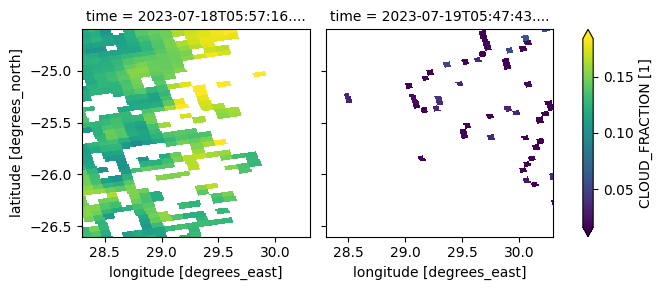

In [17]:
ds_l2_cloud['CLOUD_FRACTION'].plot(robust=True, col="time")

####  4. Sentinel-5p TROPOMI Level 2 Carbon Monoxide (CO) total column

Sentinel-5P TROPOMI Level-2 Carbon Monoxide (CO) Total Column is an atmospheric product from Sentinel‑5 Precursor’s TROPOMI that measures the vertically integrated amount of CO in the atmosphere by analyzing reflected shortwave-infrared radiation. It is used to track combustion-related pollution from sources such as biomass burning, industry, and transport, to monitor long-range transport of pollution plumes, and to support air-quality assessment and atmospheric chemistry studies.

In [18]:
ds_l2_co = dc.load(product='s5p_tropomi_l2_co',
                    group_by="solar_day", 
                      **query)

ds_l2_co

<xarray.Dataset> Size: 403kB
Dimensions:      (time: 2, latitude: 200, longitude: 200)
Coordinates:
  * time         (time) datetime64[ns] 16B 2023-07-18T05:57:16.500000 2023-07...
  * latitude     (latitude) float64 2kB -24.61 -24.62 -24.62 ... -26.59 -26.59
  * longitude    (longitude) float64 2kB 28.3 28.32 28.32 ... 30.27 30.29 30.29
    spatial_ref  int32 4B 4326
Data variables:
    CO           (time, latitude, longitude) float32 320kB 0.02195 ... nan
    dataMask     (time, latitude, longitude) uint8 80kB 1 1 1 1 1 ... 0 0 0 0 0
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

#### Masking

Before visualisation, we use the `dataMask` band to mask values affected by cloud or other issues. The code below keeps data for pixels where the data mask value is 1

In [19]:
ds_l2_co = ds_l2_co.where(ds_l2_co.dataMask == 1)

#### Visualising the band

Carbon monoxide (CO) is produced by incomplete combustion from vehicles, wildfires, and household burning, and it serves as a tracer for pollution and fire activity. It is measured in mol/m², with typical values between 0.02 and 0.07 mol/m², increasing during intense fire events.

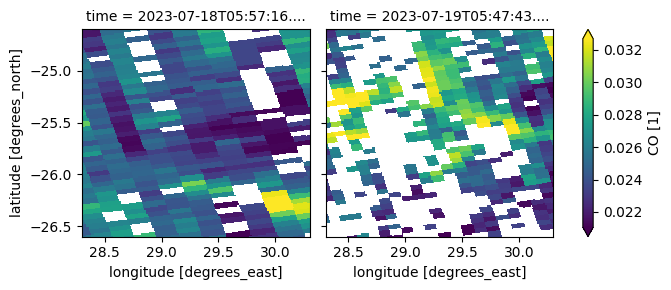

In [20]:
ds_l2_co['CO'].plot(robust=True, col="time")

####  5. Sentinel-5p TROPOMI Level 2 Formaldehyde (HCHO) total column

Sentinel-5P TROPOMI Level-2 Formaldehyde (HCHO) Total Column is an atmospheric composition product from Sentinel‑5 Precursor’s TROPOMI that measures the vertically integrated concentration of formaldehyde in the atmosphere using ultraviolet spectral observations. It is used as a proxy for volatile organic compound (VOC) emissions to identify polluted urban areas, biomass-burning regions, and biogenic sources from vegetation, and to support studies of ozone formation and air-quality dynamics.

In [21]:
ds_l2_hcho = dc.load(product='s5p_tropomi_l2_hcho',
                    group_by="solar_day", 
                      **query)

ds_l2_hcho

<xarray.Dataset> Size: 403kB
Dimensions:      (time: 2, latitude: 200, longitude: 200)
Coordinates:
  * time         (time) datetime64[ns] 16B 2023-07-18T05:57:16.500000 2023-07...
  * latitude     (latitude) float64 2kB -24.61 -24.62 -24.62 ... -26.59 -26.59
  * longitude    (longitude) float64 2kB 28.3 28.32 28.32 ... 30.27 30.29 30.29
    spatial_ref  int32 4B 4326
Data variables:
    HCHO         (time, latitude, longitude) float32 320kB 3.575e-05 ... 0.00...
    dataMask     (time, latitude, longitude) uint8 80kB 1 1 1 1 1 ... 1 1 1 1 1
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

#### Masking

Before visualisation, we use the `dataMask` band to mask values affected by cloud or other issues. The code below keeps data for pixels where the data mask value is 1

In [22]:
ds_l2_hcho = ds_l2_hcho.where(ds_l2_hcho.dataMask == 1)

#### Visualising the band

Formaldehyde (HCHO) is formed by the oxidation of volatile organic compounds from vegetation, human activities, and biomass burning, making it a useful indicator of ozone-producing chemistry. Sentinel-5P reports HCHO in mol/m², typically ranging from 1×10⁻⁵ to 8×10⁻⁵ mol/m², depending on fire activity and biogenic emissions.

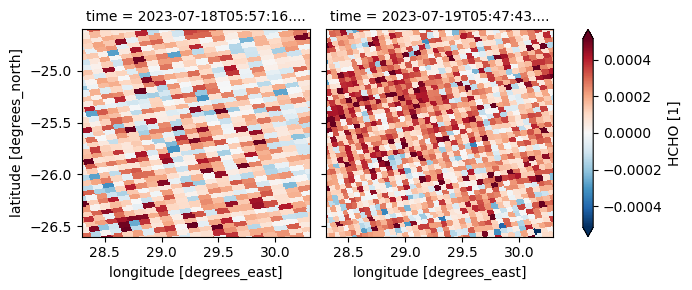

In [23]:
ds_l2_hcho['HCHO'].plot(robust=True, col="time")

####  6. Sentinel-5p TROPOMI Level 2 Nitrogen Dioxide (NO2), total and tropospheric columns

Sentinel-5P TROPOMI Level-2 Nitrogen Dioxide (NO₂) Total and Tropospheric Columns are atmospheric products from Sentinel-5 Precursor’s TROPOMI that measure the vertically integrated amount of nitrogen dioxide for the entire atmosphere (total column) and specifically within the troposphere (tropospheric column) using visible and ultraviolet spectral data. These products are used to monitor surface-level air pollution from vehicles, power plants, and industry, to evaluate air-quality trends and population exposure, and to support environmental regulation and urban pollution management

In [24]:
ds_l2_no2 = dc.load(product='s5p_tropomi_l2_no2',
                    group_by="solar_day", 
                      **query)

ds_l2_no2

<xarray.Dataset> Size: 403kB
Dimensions:      (time: 2, latitude: 200, longitude: 200)
Coordinates:
  * time         (time) datetime64[ns] 16B 2023-07-18T05:57:16.500000 2023-07...
  * latitude     (latitude) float64 2kB -24.61 -24.62 -24.62 ... -26.59 -26.59
  * longitude    (longitude) float64 2kB 28.3 28.32 28.32 ... 30.27 30.29 30.29
    spatial_ref  int32 4B 4326
Data variables:
    NO2          (time, latitude, longitude) float32 320kB 2.239e-05 ... 0.00...
    dataMask     (time, latitude, longitude) uint8 80kB 1 1 1 1 1 ... 1 1 1 1 1
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

#### Masking

Before visualisation, we use the `dataMask` band to mask values affected by cloud or other issues. The code below keeps data for pixels where the data mask value is 1

In [25]:
ds_l2_no2 = ds_l2_no2.where(ds_l2_no2.dataMask == 1)

#### Visualising the band

Nitrogen dioxide (NO₂) is a major air pollutant produced mainly by vehicles, power plants, and industrial combustion, contributing to smog and ozone formation. It is measured in mol/m², with clean background levels below 5×10⁻⁵ mol/m² and urban or industrial hotspots reaching 1–5×10⁻⁴ mol/m².

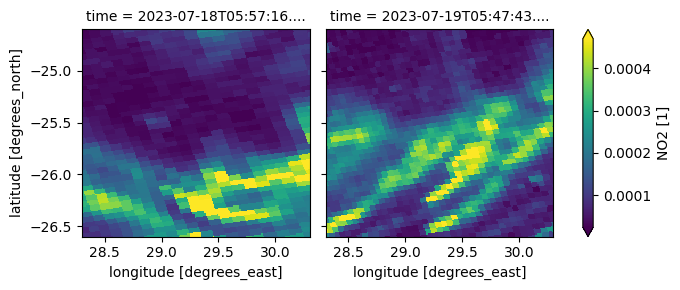

In [26]:
ds_l2_no2['NO2'].plot(robust=True, col="time")

####  7. Sentinel-5p TROPOMI Level 2 Ozone (O3) total column

Sentinel-5P TROPOMI Level-2 Ozone (O₃) Total Column is an atmospheric composition product from Sentinel-5 Precursor’s TROPOMI that measures the total amount of ozone throughout the atmosphere by analyzing ultraviolet and visible radiation absorbed by ozone molecules. It is used to monitor the ozone layer, assess exposure to harmful ultraviolet radiation, track long-term ozone trends, and support international environmental agreements related to atmospheric protection.

In [27]:
ds_l2_o3 = dc.load(product='s5p_tropomi_l2_o3',
                    group_by="solar_day", 
                      **query)

ds_l2_o3

<xarray.Dataset> Size: 403kB
Dimensions:      (time: 2, latitude: 200, longitude: 200)
Coordinates:
  * time         (time) datetime64[ns] 16B 2023-07-18T05:57:16.500000 2023-07...
  * latitude     (latitude) float64 2kB -24.61 -24.62 -24.62 ... -26.59 -26.59
  * longitude    (longitude) float64 2kB 28.3 28.32 28.32 ... 30.27 30.29 30.29
    spatial_ref  int32 4B 4326
Data variables:
    O3           (time, latitude, longitude) float32 320kB 0.1133 ... 0.1192
    dataMask     (time, latitude, longitude) uint8 80kB 1 1 1 1 1 ... 1 1 1 1 1
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

#### Masking

In [28]:
ds_l2_o3 = ds_l2_o3.where(ds_l2_o3.dataMask == 1)

#### Visualising the band

Ozone (O₃) protects life in the stratosphere by absorbing ultraviolet radiation but becomes a harmful pollutant when present near the surface. Sentinel-5P measures ozone in mol/m², commonly equivalent to 250–350 Dobson Units, with typical column values ranging from 0.08 to 0.12 mol/m².

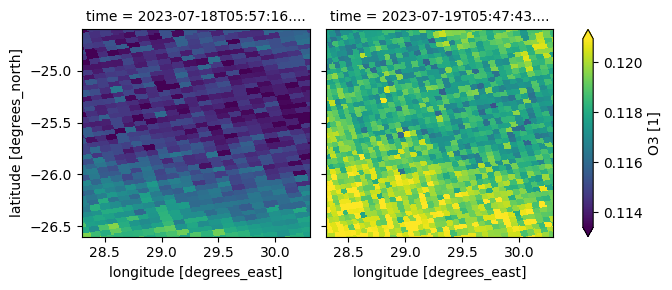

In [29]:
ds_l2_o3['O3'].plot(robust=True, col="time")

####  8. Sentinel-5p TROPOMI Level 2 Sulfur Dioxide (SO2) total column

Sentinel-5P TROPOMI Level-2 Sulfur Dioxide (SO₂) Total Column is an atmospheric product from Sentinel-5 Precursor’s TROPOMI that measures the vertically integrated amount of sulfur dioxide in the atmosphere using ultraviolet spectral observations. It is used to detect emissions from power plants, oil refineries, and smelters, to monitor volcanic eruptions in near-real-time, and to assess the contribution of sulfur pollution to air quality degradation and acid rain formation.

In [30]:
ds_l2_so2 = dc.load(product='s5p_tropomi_l2_so2',
                    group_by="solar_day", 
                      **query)

ds_l2_so2

<xarray.Dataset> Size: 403kB
Dimensions:      (time: 2, latitude: 200, longitude: 200)
Coordinates:
  * time         (time) datetime64[ns] 16B 2023-07-18T05:57:16.500000 2023-07...
  * latitude     (latitude) float64 2kB -24.61 -24.62 -24.62 ... -26.59 -26.59
  * longitude    (longitude) float64 2kB 28.3 28.32 28.32 ... 30.27 30.29 30.29
    spatial_ref  int32 4B 4326
Data variables:
    SO2          (time, latitude, longitude) float32 320kB -0.0003887 ... 0.0...
    dataMask     (time, latitude, longitude) uint8 80kB 1 1 1 1 1 ... 1 1 1 1 1
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

#### Masking

Before visualisation, we use the `dataMask` band to mask values affected by cloud or other issues. The code below keeps data for pixels where the data mask value is 1

In [31]:
ds_l2_so2 = ds_l2_so2.where(ds_l2_so2.dataMask == 1)

#### Visualising the band

Sulfur dioxide (SO₂) is a pollutant released from volcanoes, coal-fired power plants, refineries, and smelting activities, and it contributes to acid rain and respiratory problems. Sentinel-5P reports SO₂ in mol/m², with background values near zero and elevated levels reaching 1×10⁻⁴ mol/m² or more during volcanic eruptions or industrial emissions. 

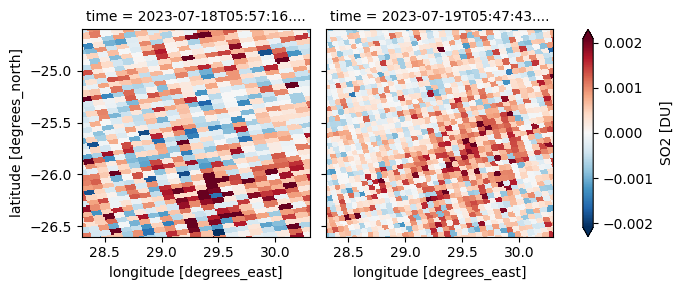

In [32]:
ds_l2_so2['SO2'].plot(robust=True, col="time")

### Calculating Total Atmospheric Gas Mass (Tonnes) from Sentinel-5P TROPOMI Data

Sentinel-5P TROPOMI Level-2 products provide atmospheric trace-gas measurements as **vertical column densities** in units of **mol/m²**. These values represent the number of moles of a gas contained in an atmospheric column above each satellite pixel. 

#### Why Compute Tonnes?

Expressing gas amounts in tonnes provides a **policy-relevant and intuitive metric** for:

- Evaluating emission sources (urban, industrial, biomass burning, wetlands)
- Quantifying atmospheric loading during pollution episodes
- Comparing different gases on the same scale
- Reporting mass-based metrics for climate and air-quality frameworks
- Supporting SDG and AU Agenda 2063 environmental assessments

Converting trace-gas columns into physically meaningful mass values allows researchers and decision-makers to translate satellite observations into actionable insights.

---

#### Molecular Weights Used in the Conversion

The molecular weight determines how many grams one mole of a gas weighs:

| Gas | Molecular Weight (g/mol) |
|-----|---------------------------|
| CH₄ (Methane) | 16.04 |
| CO (Carbon Monoxide) | 28.01 |
| NO₂ (Nitrogen Dioxide) | 46.005 |
| SO₂ (Sulfur Dioxide) | 64.066 |
| HCHO (Formaldehyde) | 30.026 |
| O₃ (Ozone) | 48.00 |

These values are provided to the conversion function so that any Sentinel-5P gas product can be processed consistently.

---



The function below performs the full conversion from **Sentinel-5P TROPOMI Level-2 gas column data** (provided in **mol/m²**) into **total atmospheric mass expressed in tonnes** for your area of interest (AOI). 

To run the calculation, you only need to supply:

1. **The gas column variable** from your dataset  
   - Examples: `no2_tropospheric_column`, `ch4_column`, `co_column`, `so2_column`, `hcho_column`, `ozone_total_vertical_column`

2. **The molecular weight of the gas** (in g/mol)  

The function automatically:
- Computes pixel areas from the latitude/longitude grid  
- Applies cloud masking if needed  
- Converts mol/m² → mol → grams → tonnes  
- Sums across all valid pixels  

This allows you to transform satellite-observed column densities into a meaningful physical metric (tonnes) for environmental analysis, climate studies, emission tracking, and reporting.

In [33]:
def compute_tonnes_timeseries(ds, molecular_weight):
    """
    Computes total atmospheric mass (tonnes) for every timestep in a Sentinel-5P
    Dataset or DataArray. Automatically detects the gas variable if needed.
    Returns a DataFrame with 'timestep' and 'tonnes' columns.
    """

    # -------------------------------------------------------
    # Case 1: Input is a DataArray
    # -------------------------------------------------------
    if isinstance(ds, xr.DataArray):
        gas_da_all = ds

    # -------------------------------------------------------
    # Case 2: Input is a Dataset
    # -------------------------------------------------------
    elif isinstance(ds, xr.Dataset):
        non_dimension_vars = [
            v for v in ds.data_vars
            if v not in ["latitude", "longitude", "time", "dataMask"]
        ]

        if len(non_dimension_vars) != 1:
            raise ValueError(f"Could not detect gas variable. Found: {non_dimension_vars}")

        gas_var = non_dimension_vars[0]
        gas_da_all = ds[gas_var]

    else:
        raise TypeError("Input must be an xarray Dataset or DataArray")

    R = 6371000  # Earth radius
    results = []

    # -------------------------------------------------------
    # Loop over timesteps
    # -------------------------------------------------------
    for idx, t in enumerate(gas_da_all.time.values):
        da = gas_da_all.isel(time=idx)

        # Apply dataMask if available
        if isinstance(ds, xr.Dataset) and "dataMask" in ds:
            da = da.where(ds["dataMask"].isel(time=idx) == 1)

        lat = da.latitude
        lon = da.longitude

        # Compute resolution
        dlat = np.abs(lat.diff("latitude").mean().item())
        dlon = np.abs(lon.diff("longitude").mean().item())

        # Convert to radians
        lat_rad = np.deg2rad(lat)
        dlat_rad = np.deg2rad(dlat)
        dlon_rad = np.deg2rad(dlon)

        # Pixel area (1-D latitude)
        area_1d = R**2 * np.cos(lat_rad) * dlat_rad * dlon_rad
        area_da = xr.DataArray(area_1d, coords={"latitude": lat}, dims=["latitude"])

        # Expand to full grid
        area_full = area_da.broadcast_like(da)

        # mol/m² → mol → grams → tonnes
        mol_per_pixel = da * area_full
        grams_per_pixel = mol_per_pixel * molecular_weight
        tonnes_per_pixel = grams_per_pixel / 1e6

        total_tonnes = tonnes_per_pixel.sum(skipna=True).item()

        results.append([pd.to_datetime(t), total_tonnes])

    # -------------------------------------------------------
    # Return a DataFrame with headers
    # -------------------------------------------------------
    df = pd.DataFrame(results, columns=["timestep", "tonnes"])
    df["tonnes"] = df["tonnes"].apply(lambda x: f"{x:,.0f}")
    return df

In the cell below, we demonstrate how to compute the total atmospheric mass of **methane (CH₄)** over the selected Area of Interest (AOI) using Sentinel-5P TROPOMI Level-2 data from the **CH₄ dataset already loaded above**. The calculation applies the conversion function defined earlier, which transforms methane column values (mol/m²) into total mass expressed in tonnes by combining pixel area, molecular weight, and cloud masking. This workflow allows us to quantify the total methane present in the AOI and the same procedure can be applied to any other Sentinel-5P gas product by providing the appropriate gas variable and molecular weight. The dataMask flags whether a pixel contains a valid gas retrieval, while the s5p_tropomi_l2_cloud product provides cloud information—specifically the cloud_fraction—which we use to exclude pixels where cloud contamination would reduce the accuracy of atmospheric gas measurements. A cloud threshold of 0.3 is recommended because it effectively removes pixels where cloud contamination begins to significantly degrade gas retrieval accuracy while still preserving enough clear-sky observations for reliable analysis.

In [34]:
cloud_mask = ds_l2_cloud['CLOUD_FRACTION'] < 0.3

In [35]:
mask_ch4 = ds_l2_ch4['CH4'].where(cloud_mask)

### Visualising the CH₄ Column After Removing Cloud-Contaminated Pixel

The plot below shows the CH₄ column values over the Area of Interest (AOI) after applying a cloud-fraction filter to remove pixels with excessive cloud contamination. Sentinel-5P methane retrievals can be strongly affected by cloud cover, so we retain only pixels where `cloud_fraction < 0.3`. This ensures that the visualisation reflects clearer and more reliable methane observations for the selected 2-day time period.

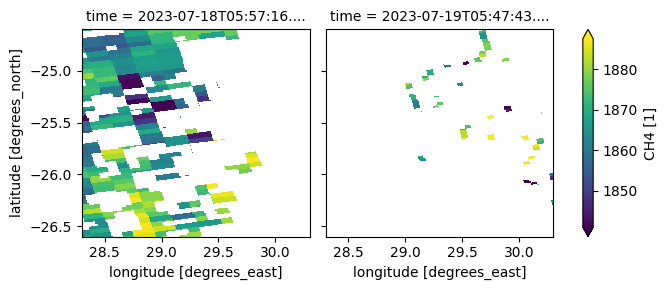

In [36]:
mask_ch4.plot(robust=True, col="time")

In [37]:
ch4_tonnes_ts = compute_tonnes_timeseries(
    mask_ch4,
    molecular_weight=16.04,
)

ch4_tonnes_ts

,timestep,tonnes
0,2023-07-18 05:57:16.500,"448,918,482"
1,2023-07-19 05:47:43.500,"26,269,813"


## Conclusion

Through Digital Earth Africa, data from Sentinel-5 Precursor and its TROPOMI are transforming access to atmospheric information across Africa by making air-quality and climate datasets readily available and easy to use. DE Africa removes technical barriers to satellite data by offering open access, cloud processing, and analysis-ready products, enabling researchers and governments to monitor pollution, greenhouse gases, and ozone without specialised infrastructure. This directly supports the goals of the United Nations Sustainable Development Goals and the African Union Agenda 2063 by strengthening environmental governance, public-health planning, climate action, and regional cooperation, helping countries design informed policies for a healthier and more resilient Africa.

---

## Additional information

<b> License </b> The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0).

Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

<b> Contact </b> If you need assistance, please post a question on the [DE Africa Slack channel](https://digitalearthafrica.slack.com/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).

If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

<b> Compatible datacube version </b>

In [38]:
print(datacube.__version__)

1.8.20


**Last Tested:**

In [39]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2025-12-10'